In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.simplefilter('ignore') ## ignore warning to improve readability
pd.set_option('display.max_columns', 300) ## make every column visible
plt.style.use('ggplot')
%matplotlib inline

In [5]:
#!ls ## all needed files are in the current folder

In [53]:
df = pd.read_csv(r"bio-degradabale-data.csv", sep=";", header=None)

In [54]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [99]:
f = open("bio-desc.txt", "r")
description_df = pd.DataFrame(columns=['short', 'description'])
info = "initial"
while len(info):
    info=f.readline()
    if not info:
        break
    info = info.split(")", 1)[1][:-2]
    short = info.split(": ",1)[0][1:]
    description = info.split(": ",1)[1]
    #description_df.loc[len(description_df)] = info.split(": ",1)
    description_df.loc[len(description_df)] = short,description

In [103]:
description_df.loc[1]

short                                                    J_Dz(e)
description    Balaban-like index from Barysz matrix weighted...
Name: 1, dtype: object

In [101]:
df.columns = description_df.short

In [86]:
df.head()

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


### Data Cleaning

In [59]:
df.dtypes.value_counts()

int64      24
float64    17
object      1
dtype: int64

In [60]:
## check if any missing values
df.isnull().sum().sum()

0

No null values

Some classification models, like logistic regression require the target classes to be expressed as integers. Since degradability ("RB") is the desired positive class it will be encoded as 1, wheres as non degradability will be decoded as 0.

In [61]:
df.replace(["RB", "NRB"], [1,0], inplace = True) # apply decoding

In [105]:
# rename target for better readability
df.rename(columns = {"experimental class" : "degradable"}, inplace=True);

In [106]:
#save the cleaned data
df.to_csv("bio_cleaned.csv", index=False)

In [107]:
df.head()

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


In [108]:
df.columns

Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L',
       'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)',
       'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d',
       'B04[C-Br]', 'SdO', 'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon',
       'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX',
       'degradable'],
      dtype='object', name='short')

The provided dataset is clean and the target variable properly decoded.

### Exploratory Data Analysis (EDA)

The goal of the following section is to garin insights about the data and to identify columns with great impact on the target classes.

In [109]:
df.describe()

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,1.436967,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,0.008531,0.073934,0.029384,1.238727,1.405687,0.039810,0.147867,0.031280,2.215641,-0.001206,0.026540,8.780510,2.668344,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,0.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,3.116577,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,0.101802,0.317475,0.217997,0.096466,4.788542,0.195606,0.355137,0.199544,0.226131,0.158928,0.160812,11.895889,2.096607,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,0.000000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.101000,-0.008000,0.000000,0.000000,1.446500,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.247000,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,2.000000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.358000,0.005000,0.000000,12.465000,3.146000,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,1.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.859000,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,1.000000


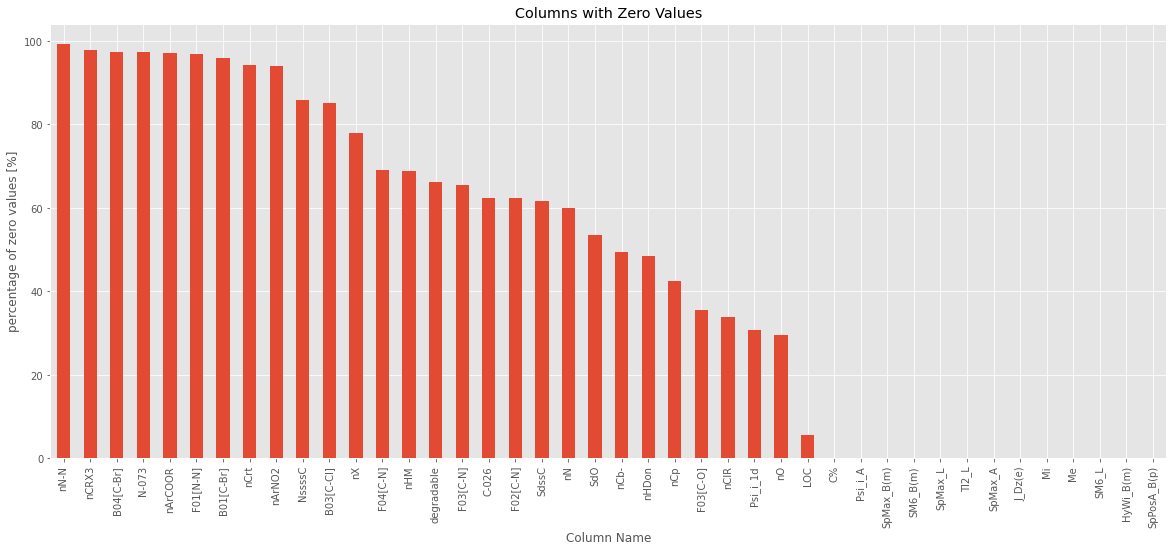

In [110]:
#check data for zero values
zeros = [round(sum(df.iloc[:,i] == 0)/len(df),3)*100 for i in range(df.shape[1])]
zero = pd.DataFrame(zeros , index = df.columns).sort_values(by=0, ascending = False)

#plot results
zero.plot(kind = "bar", legend = False, figsize =(20,8))
plt.title("Columns with Zero Values")
plt.ylabel("percentage of zero values [%]")
plt.xlabel("Column Name");

In [111]:
df["degradable"].value_counts(normalize = True)
# NRB = 0 --> Not Biodegradable
# RB = 1 --> Biodegradable

0    0.662559
1    0.337441
Name: degradable, dtype: float64

In [113]:

#get critical correlation values
df.corr().applymap(lambda x: "" if abs(x) == 1 else x if abs(x) > .90 else "")

short,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,degradable
short,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SpMax_L,,,,,,,,,,,,,,,0.911546,,,,,,,,,,,,0.918928,,,,,,,,,,,,,,,
J_Dz(e),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nHM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F01[N-N],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F04[C-N],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NssssC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCb-,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C%,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nCp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


The above figure shows that cocorrelations are present. Therefore the following columns will be dropped:

In [114]:
corr_drop = ["SM6_L","SpMax_A","SM6_B(m)"]
corr_keep = list(set(df.columns)-set(corr_drop))

In the next step the remaining features will be how good these features are able to divide the degradable and nondegradable substances. There the set is split into the target classes and then each each calss is plotted side by side for each feature.

In [115]:
# split data into degradable and nondegradable subsets
bio_df = df.loc[df["degradable"] == 1]
no_bio_df = df.loc[df["degradable"] == 0]

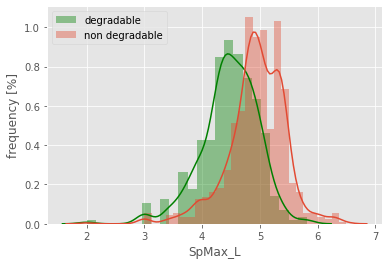

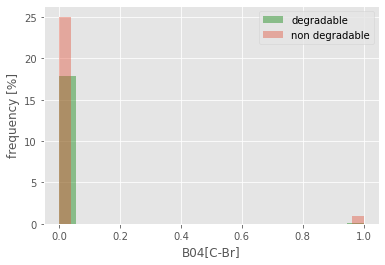

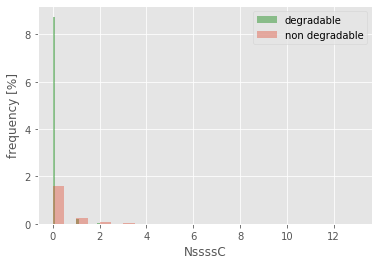

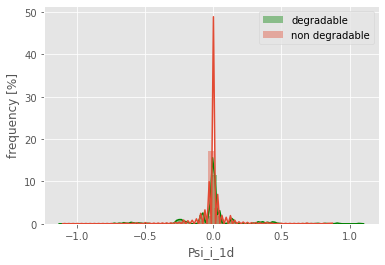

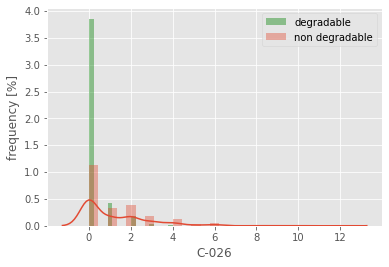

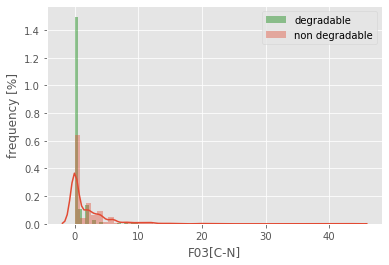

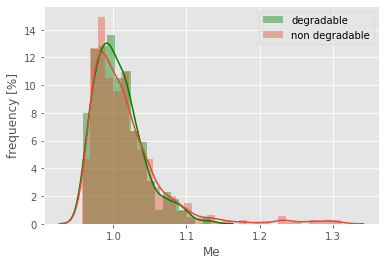

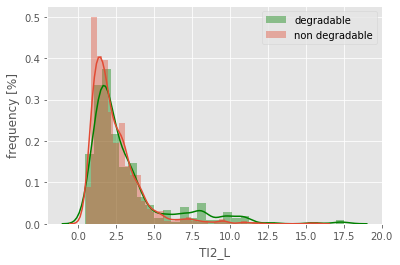

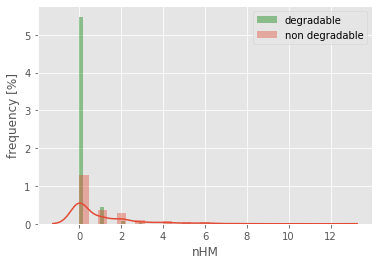

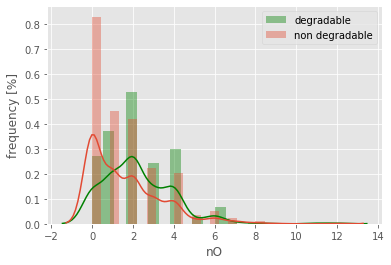

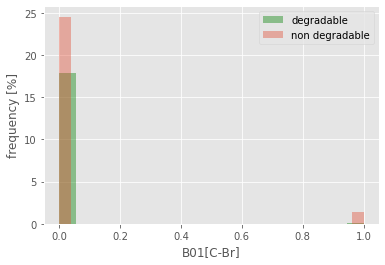

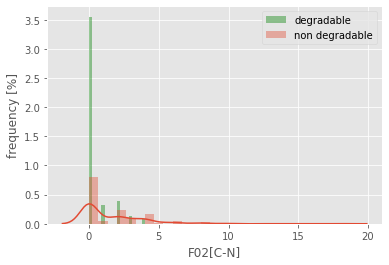

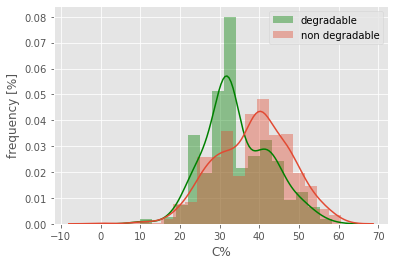

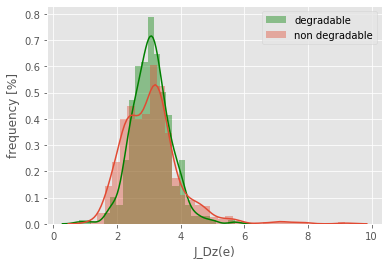

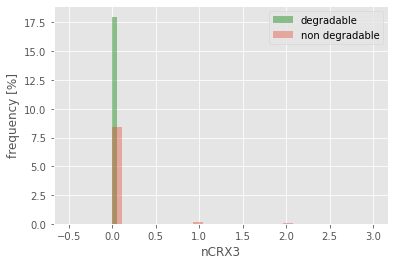

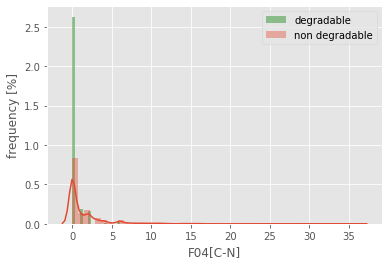

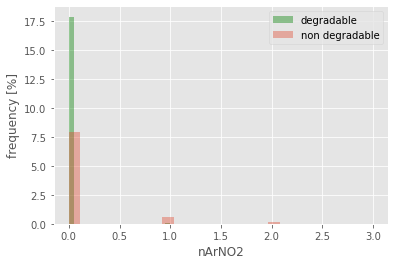

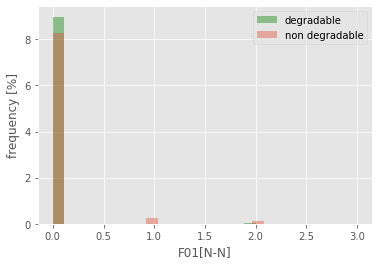

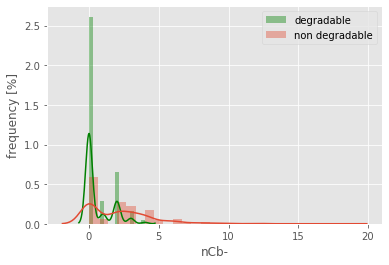

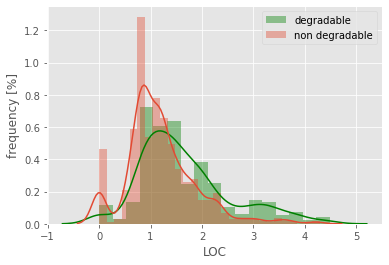

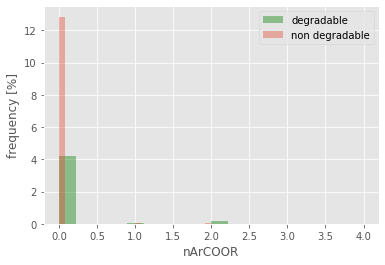

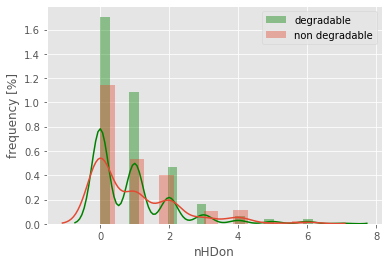

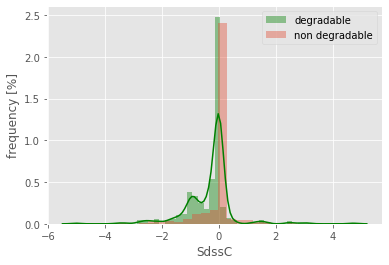

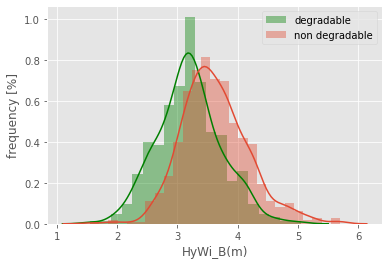

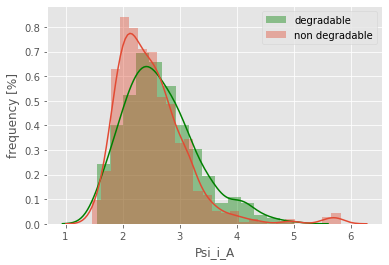

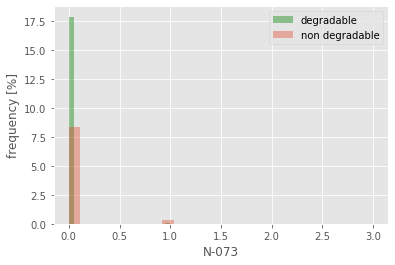

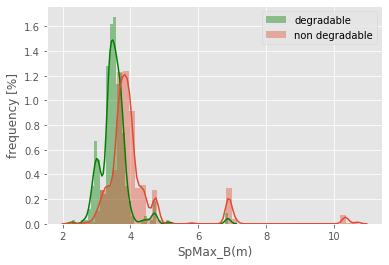

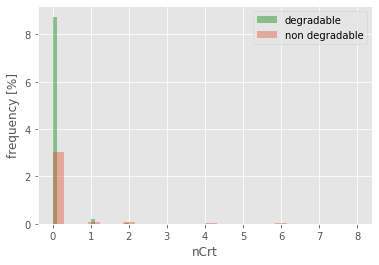

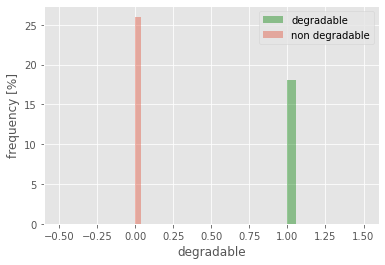

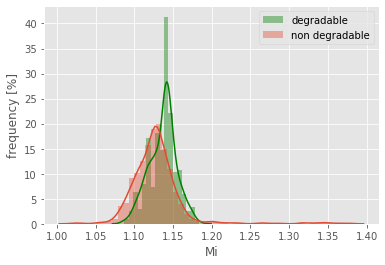

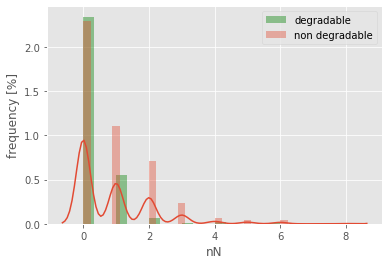

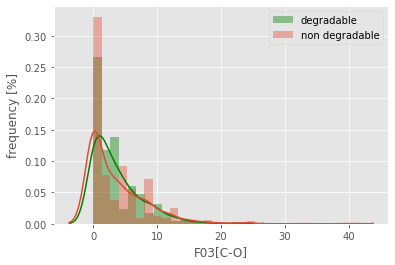

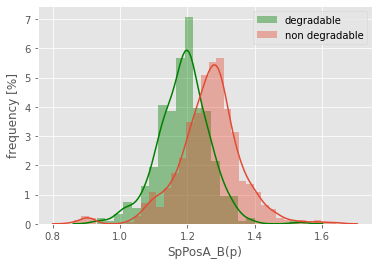

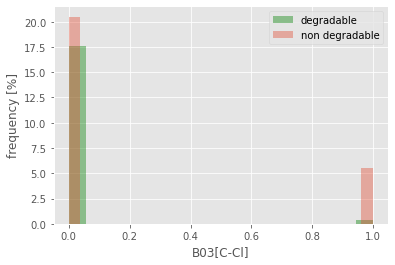

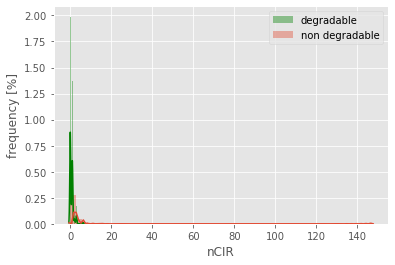

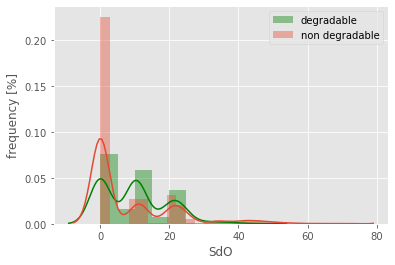

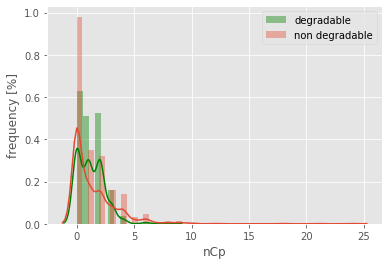

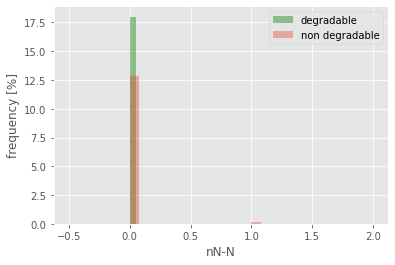

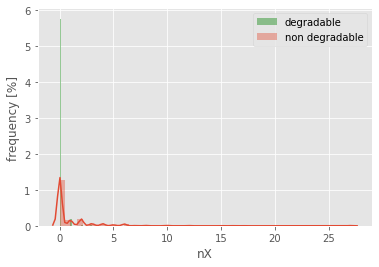

In [116]:
features = corr_keep #only use the features that are not cocorrelated

#plot the features side by side
for col in list(filter(lambda x: x != "diagnosis", features)):
    sns.distplot(bio_df[col] ,label = "degradable", color = "g")
    sns.distplot(no_bio_df[col], label = "non degradable" )
    plt.ylabel("frequency [%]")
    plt.legend()
    plt.show()

The distribution show that the best prediciting features for class seperation are:

SpPosA_B(p)
HyWi_B(m)
C%
SpMax_B(m)
SpMax_L